In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("check_forward_kinematrics.ipynb")

# Arm forward kinematics

Create an arm with links and a gripper, then move the links by joint angles.

You shouldn't have to edit this code, except to try some other joint angles. The bulk of the code is in arm_forward_kinematics.py, but you'll need a working version of matrix_transforms.py and object_in_world.py as well.

Slides: https://docs.google.com/presentation/d/11gInwdUCRLz5pAwkYoHR4nzn5McAqfdktITMUe32-pM/edit?usp=sharing

In [2]:
# Doing the imports for you
import numpy as np
import json as json
import matplotlib.pyplot as plt

<!-- BEGIN QUESTION -->



In [3]:
import sys; 
sys.path.insert(0, '.')
sys.path.insert(0, '../Skills')

# These commands will force JN to actually re-load the external file when you re-execute the import command
%load_ext autoreload
%autoreload 2

In [4]:
import matrix_transforms as mt
from objects_in_world import read_object, get_pts_as_numpy_array, plot_object_in_world_coord_system
import arm_forward_kinematics as afk

# Step 1: Arm geometry

Build your arm pieces out of squares and wedges
You will need to fill in get_pts_as_numpy_array in objects_in_world.py, if you haven't done so already.

The rest of the methods to fill in are in arm_forward_kinematics, the first section - set_transform_xxx

In [5]:
# Syntax check of the methods used in this problem
obj = read_object("Square") # method in objects_in_world
base = afk.set_transform_base(obj)

# Check this method in obj
pts = get_pts_as_numpy_array(base)
if pts.shape != (3, len(base["XYs"])):
    print("Should be a 3xn matrix")

# Check this one works
mat = mt.make_matrix_from_sequence(base["Matrix seq"])
if mat.shape != (3, 3):
    print("Should be a 3x3 matrix")
    
# The geometry methods - should take in an object, return an object, with Matrix seq st
link = afk.set_transform_link(obj, 0.75, 0.5)

palm = afk.set_transform_palm(obj, 0.5)

finger = afk.set_transform_finger(obj, 0.5, (0.75, 0.1), True)

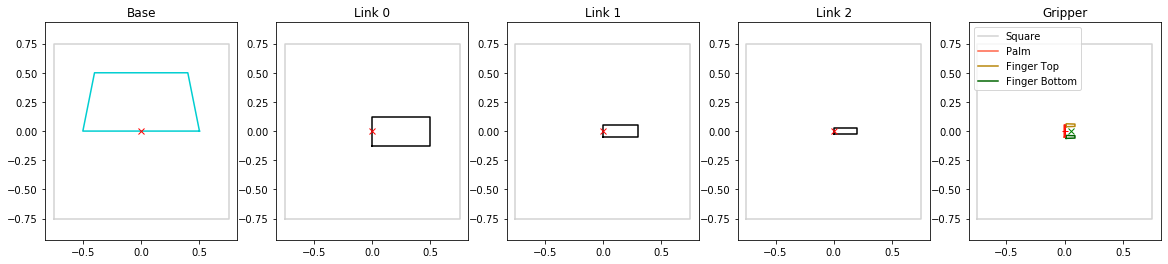

In [6]:
base_size_param = (1.0, 0.5)
link_sizes_param = [(0.5, 0.25), (0.3, 0.1), (0.2, 0.05)]
palm_width_param = 0.1
finger_size_param = (0.075, 0.025)

# This function calls each of the set_transform_xxx functions, and puts the results
# in a list (the gripper - the last element - is a list)
arm_geometry = afk.create_arm_geometry(base_size_param, link_sizes_param, palm_width_param, finger_size_param)
if len(arm_geometry) != 5:
    print("Wrong number of components, should be 5, got {len(arm_geometry)}")
if len(arm_geometry[-1]) != 3:
    print("Wrong number of gripper components, should be 3, got {len(arm_geometry[-1])}")

fig, axs = plt.subplots(1, len(arm_geometry), figsize=(4 * len(arm_geometry), 4))

# Should be 5 windows, with the base, 3 links, and the gripper
afk.plot_arm_components(axs, arm_geometry)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Step 2 - rotate links by angles

Now rotate all of the components by an angle in their own coorinate system


In [7]:
# Syntax check for the methods used 
mat = afk.get_rotation_link(arm_geometry[1])
if mat.shape != (3,3):
    print("Should return a 3x3 matrix")

mat = afk.get_matrix_finger(arm_geometry[-1][1])
if mat.shape != (3,3):
    print("Should return a 3x3 matrix")

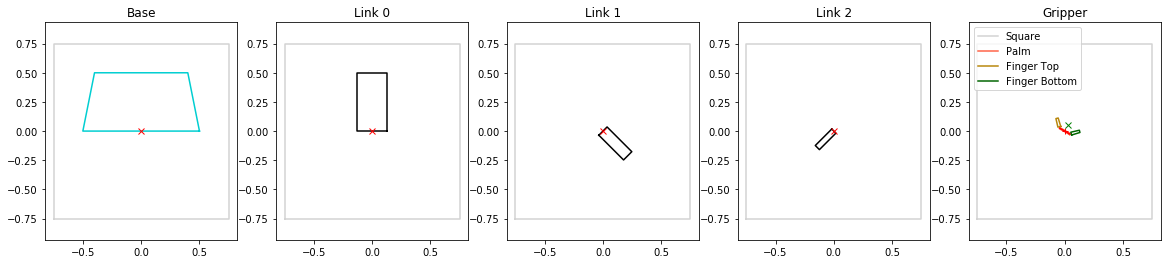

In [8]:
fig, axs = plt.subplots(1, len(arm_geometry), figsize=(4 * len(arm_geometry), 4))

# Several different angles to check your results with
angles_none = [0.0, 0.0, 0.0, [0.0, 0.0, 0.0]]
angles_check_fingers = [np.pi/2, -np.pi/4, -3.0 * np.pi/4, [0.0, np.pi/4.0, -np.pi/4.0]]
angles_check_wrist = [np.pi/2, -np.pi/4, -3.0 * np.pi/4, [np.pi/3.0, 0.0, 0.0]]
angles_check = [np.pi/2, -np.pi/4, -3.0 * np.pi/4, [np.pi/3.0, np.pi/4.0, -np.pi/4.0]]

# Setting the actual angles
afk.set_angles_of_arm_geometry(arm_geometry, angles_check)

# Draw the result - make sure to fix where this draws the fingers
afk.plot_arm_components(axs, arm_geometry, b_with_angles=True)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Step 3 - matrices all the way down
Build all the matrices needed to do the forward kinematics

In [9]:
# Syntax check of the methods used here
mat = afk.get_matrix_base(arm_geometry[1]) # CHANGED FROM arm_geometry[0]
# print(mat, "\n")
if mat.shape != (3,3):
    print("Should return a 3x3 matrix")

mat = afk.get_matrix_link(arm_geometry[1]) # CHANGED FROM arm_geometry[0]
# print(mat, "\n")
if mat.shape != (3,3):
    print("Should return a 3x3 matrix")

matrices = afk.get_matrices_all_links(arm_geometry)
# print(matrices)
if len(matrices) != len(arm_geometry):
    print("Should have one matrix for each piece of geometry")

Matrix 0 is
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Matrix 1 is
[[ 0.  -1.   0. ]
 [ 1.   0.   0.5]
 [ 0.   0.   1. ]]
Matrix 2 is
[[-0.5  -0.87 -0.25]
 [ 0.87 -0.5   0.93]
 [ 0.    0.    1.  ]]
Matrix 3 is
[[ 0.26 -0.97 -0.17]
 [ 0.97  0.26  1.22]
 [ 0.    0.    1.  ]]
Matrix 4 is
[[-0.79 -0.61 -0.33]
 [ 0.61 -0.79  1.34]
 [ 0.    0.    1.  ]]


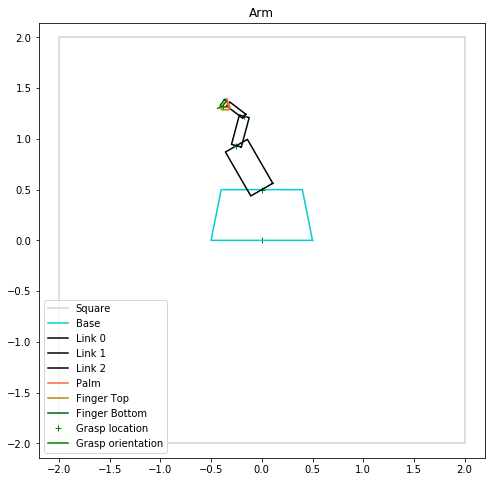

In [10]:
fig2, axs2 = plt.subplots(1, 1, figsize=(8, 8))

# More angles to check
angles_check_link_0 = [np.pi/4, 0.0, 0.0, [0.0, 0.0, 0.0]]
angles_check_link_0_1 = [np.pi/4, -np.pi/4, 0.0, [0.0, 0.0, 0.0]]
angles_gripper_check = [np.pi/6.0, -np.pi/4, 1.5 * np.pi/4, [np.pi/3.0, -np.pi/8.0, np.pi/6.0]]

# Actually set the angles
afk.set_angles_of_arm_geometry(arm_geometry, angles_gripper_check)
# And get the matrices
matrices = afk.get_matrices_all_links(arm_geometry)

# Print the matrices - if you want
np.set_printoptions(precision=2, suppress=True)
for i, m in enumerate(matrices):
    print(f"Matrix {i} is\n{m}")
    
# This is the part that mattters - draw the arm
afk.plot_complete_arm(axs2, arm_geometry, matrices)


<!-- END QUESTION -->

# Step 4 - Put a + and a line at the grasp location
This should just be a matter of using the matrices you're already calculating.

In [11]:
# Syntax check
(x, y) = afk.get_gripper_location(arm_geometry)
if x == 0 and y == 0:
    print("Fix this method")
    
(vx, vy) = afk.get_gripper_orientation(arm_geometry)
if vx == 0 and vy == 0:
    print("Fix this method")

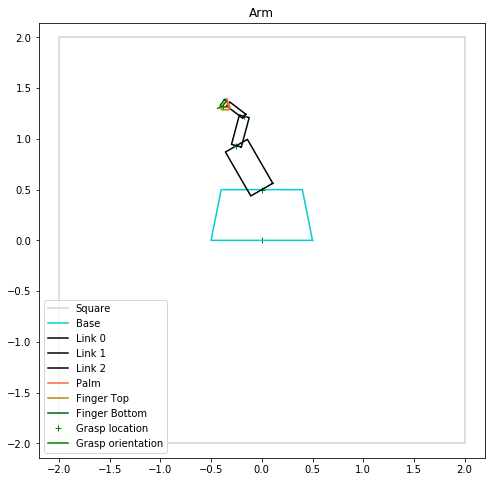

In [12]:
fig2, axs2 = plt.subplots(1, 1, figsize=(8, 8))
# This time there should be a green plus and a line between the fingers
afk.plot_complete_arm(axs2, arm_geometry, matrices)

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [13]:

# List of names (creates a set)
worked_with_names = {"Deanna Flynn", "Rafael Morales," "Maddie Shippy", "Triniti Armstrong", "Luke Strohbehn"}
# List of URLS (creates a set)
websites = {"NumPy documentation"}
# Approximate number of hours, including lab/in-class time
hours = 12

# for all row, column in all_indices_from_where
#.   if this is the column for wrist torque 
#.      print(f"Row: {r}, Time step: {c // n_time_steps} Successful y/n: {pick_data[r, -1] == 1}, value: {pick_data[r, c]}")

In [14]:
grader.check("hours_collaborators")

KeyError: 'OK_FORMAT'

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Submit through gradescope, forward kinematics

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export()